In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
# Reading data
df = pd.read_csv("Housing.csv")
df.columns

Index(['Unnamed: 0', 'longitude', 'latitude', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'median_house_value', 'ocean_proximity'],
      dtype='object')

In [3]:
df = df.drop(columns='Unnamed: 0')

In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# Filling null values
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
#histogram
def histogram(x):
  n = len(x.columns)

  col = 3
  row = n//col + 1

  plt.figure(figsize = (15, 25))
  for i in range(n):
    plt.subplot(row, col, i+1)
    sns.histplot( x = x[x.columns[i]], bins=30, color='blue', edgecolor='black', kde=True)
    plt.xlabel(x.columns[i])
    plt.ylabel('Frequency')
  plt.show()

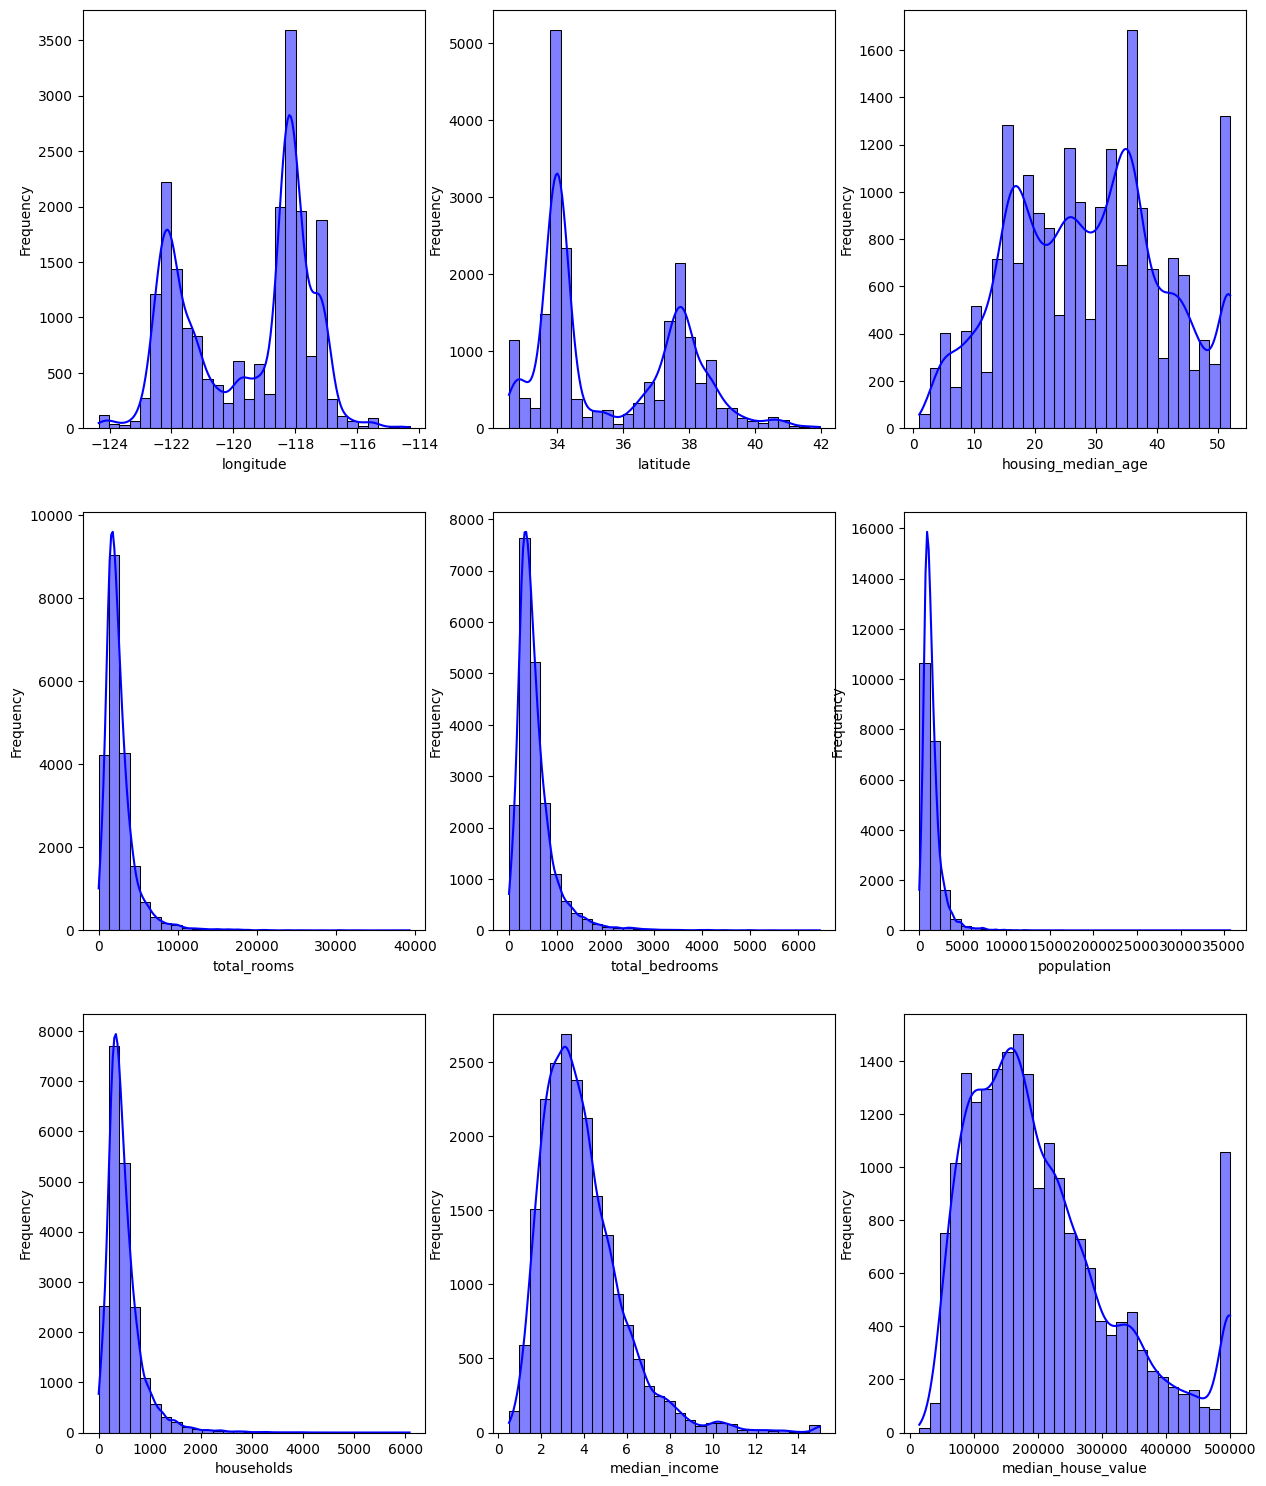

In [6]:
histogram(df.drop(columns='ocean_proximity'))

In [14]:
#bargraph
def bargraph(y, x):
  plt.figure(figsize = (5,5))
  sns.countplot(y = x, data = y)
  plt.show()

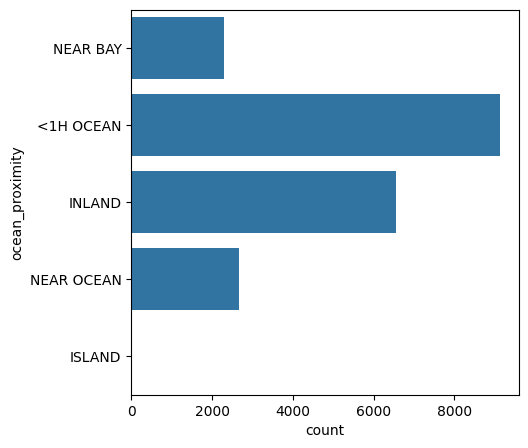

In [15]:
bargraph(df[["ocean_proximity"]], "ocean_proximity")

In [17]:
def boxplot(x):
  plt.figure(figsize = (15, 20))
  n = len(x.columns)
  cols = 3
  rows = n//cols + 1
  for i in range(n):
    plt.subplot(rows, cols, i+1)
    sns.boxplot( data = x[x.columns[i]])
  plt.show()

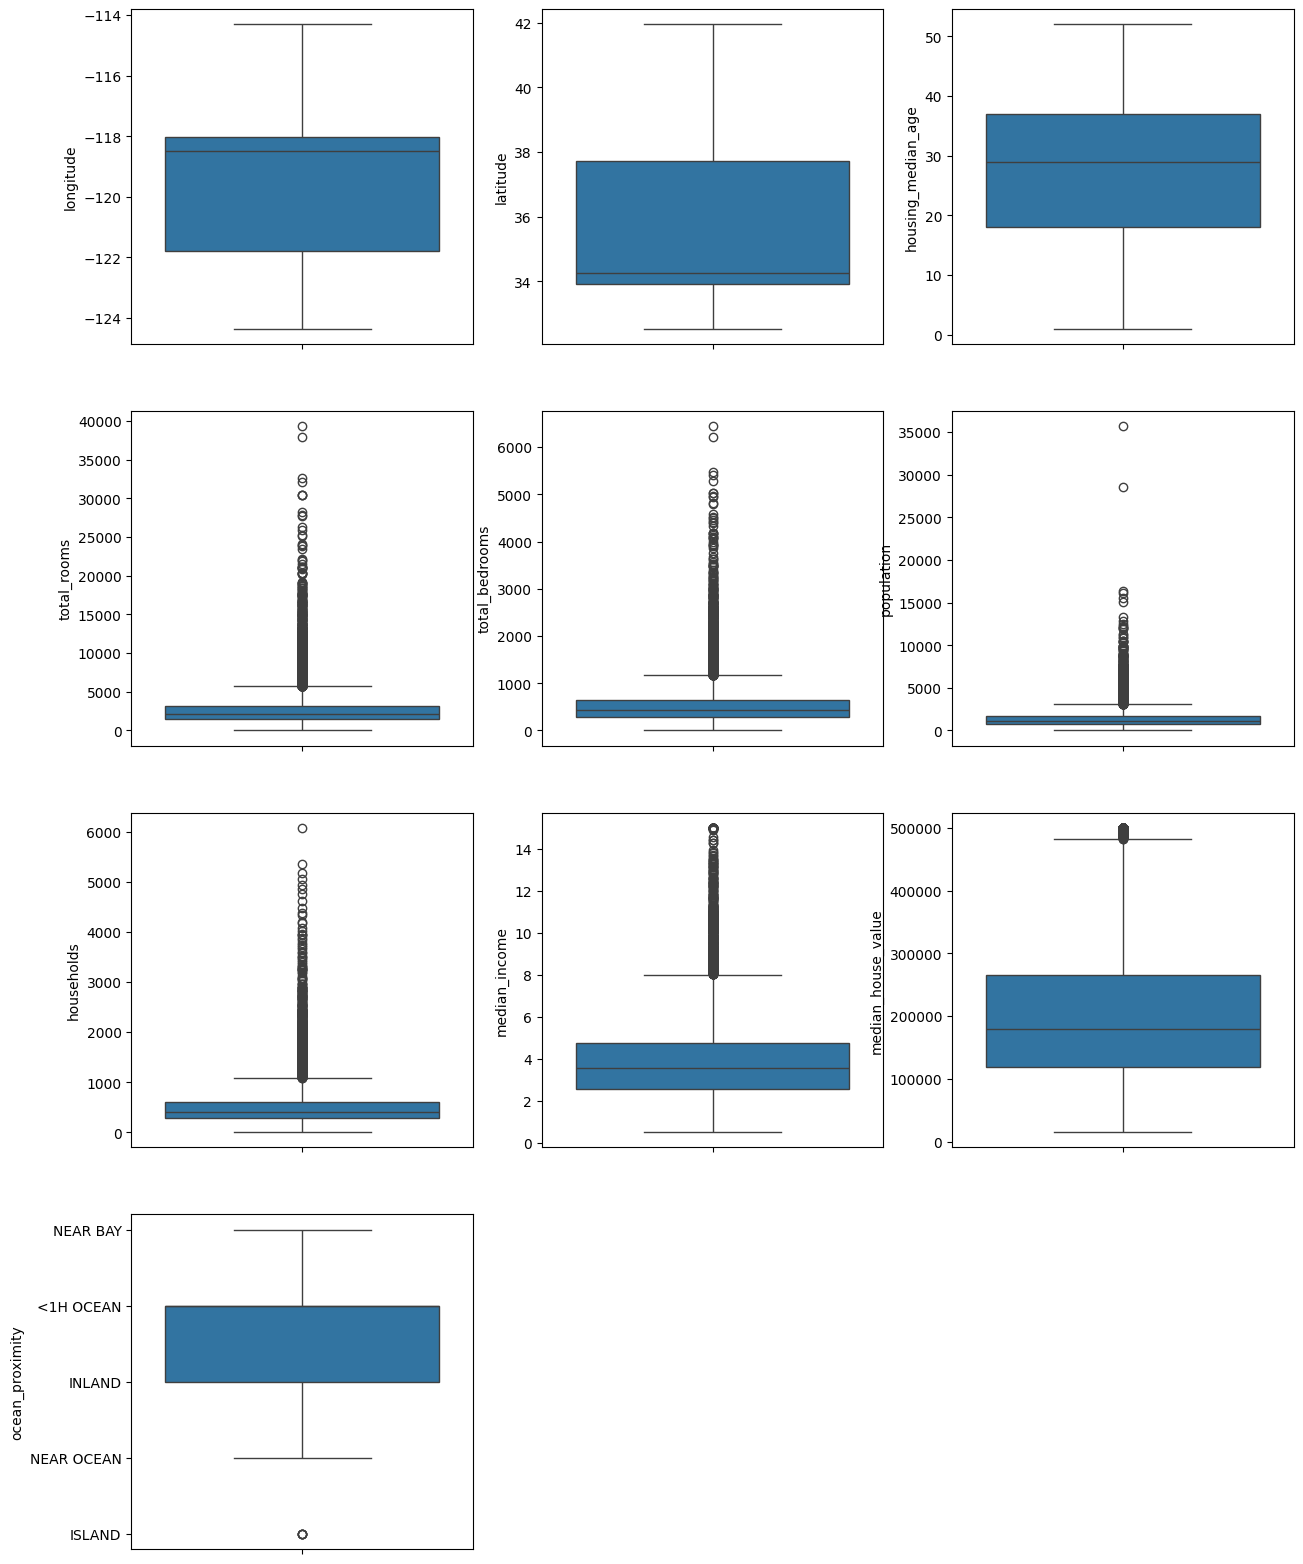

In [19]:
boxplot(df)

In [20]:
# Correlation Matrix
def correlation_matrix(df):
  plt.figure(figsize=(10, 5))
  sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
  plt.title('Correlation Heatmap')
  plt.show()

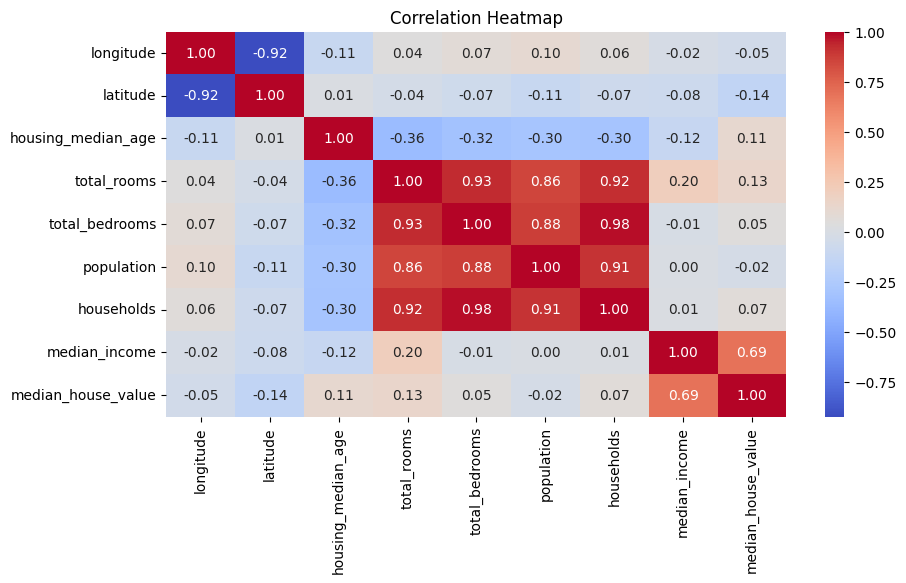

In [21]:
correlation_matrix(df)

In [22]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
led = LabelEncoder()
df['ocean_proximity'] =led.fit_transform(df['ocean_proximity'])
df.shape
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


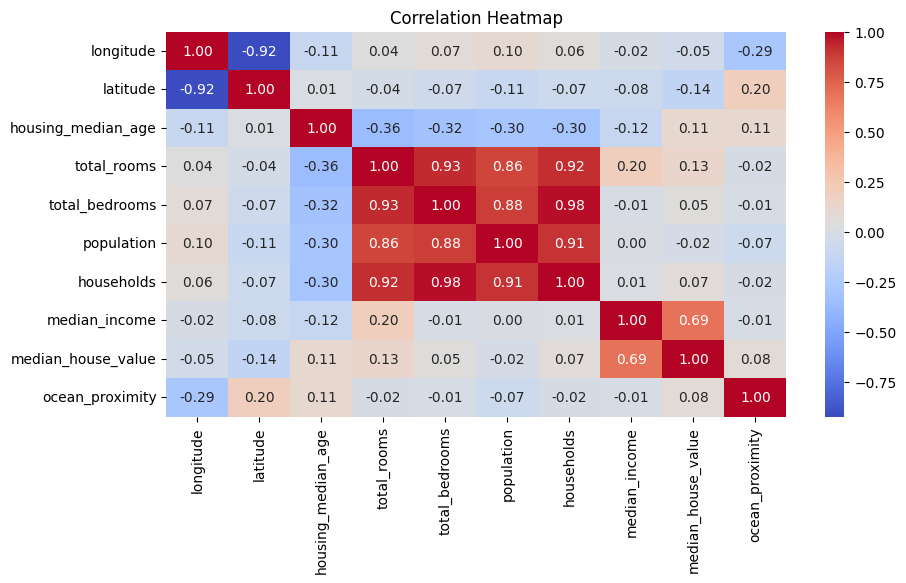

In [23]:
correlation_matrix(df)

In [24]:
# Feature engineering
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']
columns_to_drop = ['total_rooms', 'total_bedrooms', 'households', 'population']
df = df.drop(columns=columns_to_drop)

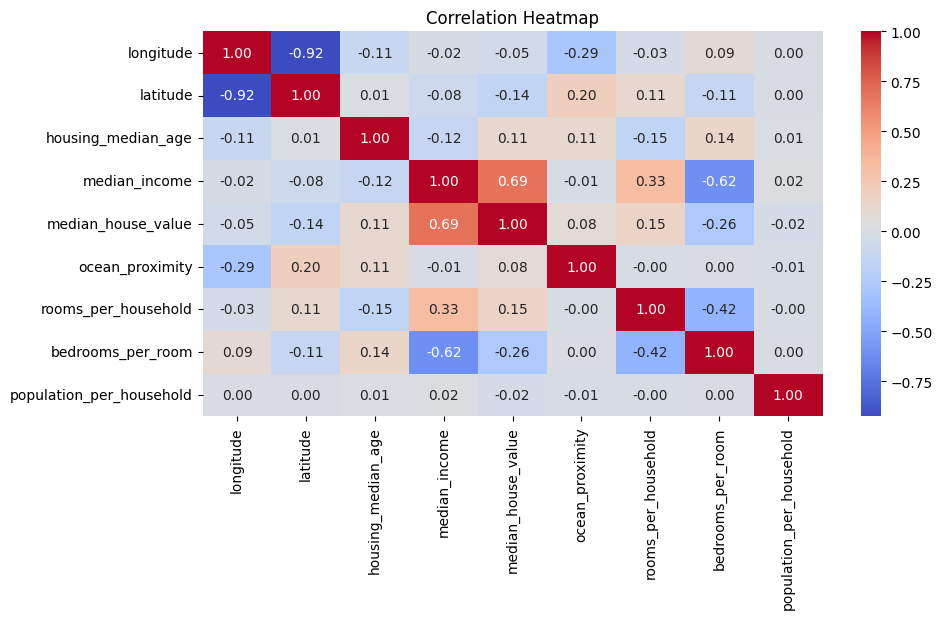

In [25]:
correlation_matrix(df)

In [26]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [27]:
# Removing outliers
columns = ['longitude', 'latitude', 'housing_median_age', 'median_income',
       'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

def remove_outliers(x, columns):
    for col in columns:
        Q1 = x[col].quantile(0.25)
        Q3 = x[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        x = x[(x[col] >= lower_bound) & (x[col] <= upper_bound)]
    return x

In [28]:
df = remove_outliers(df, columns)

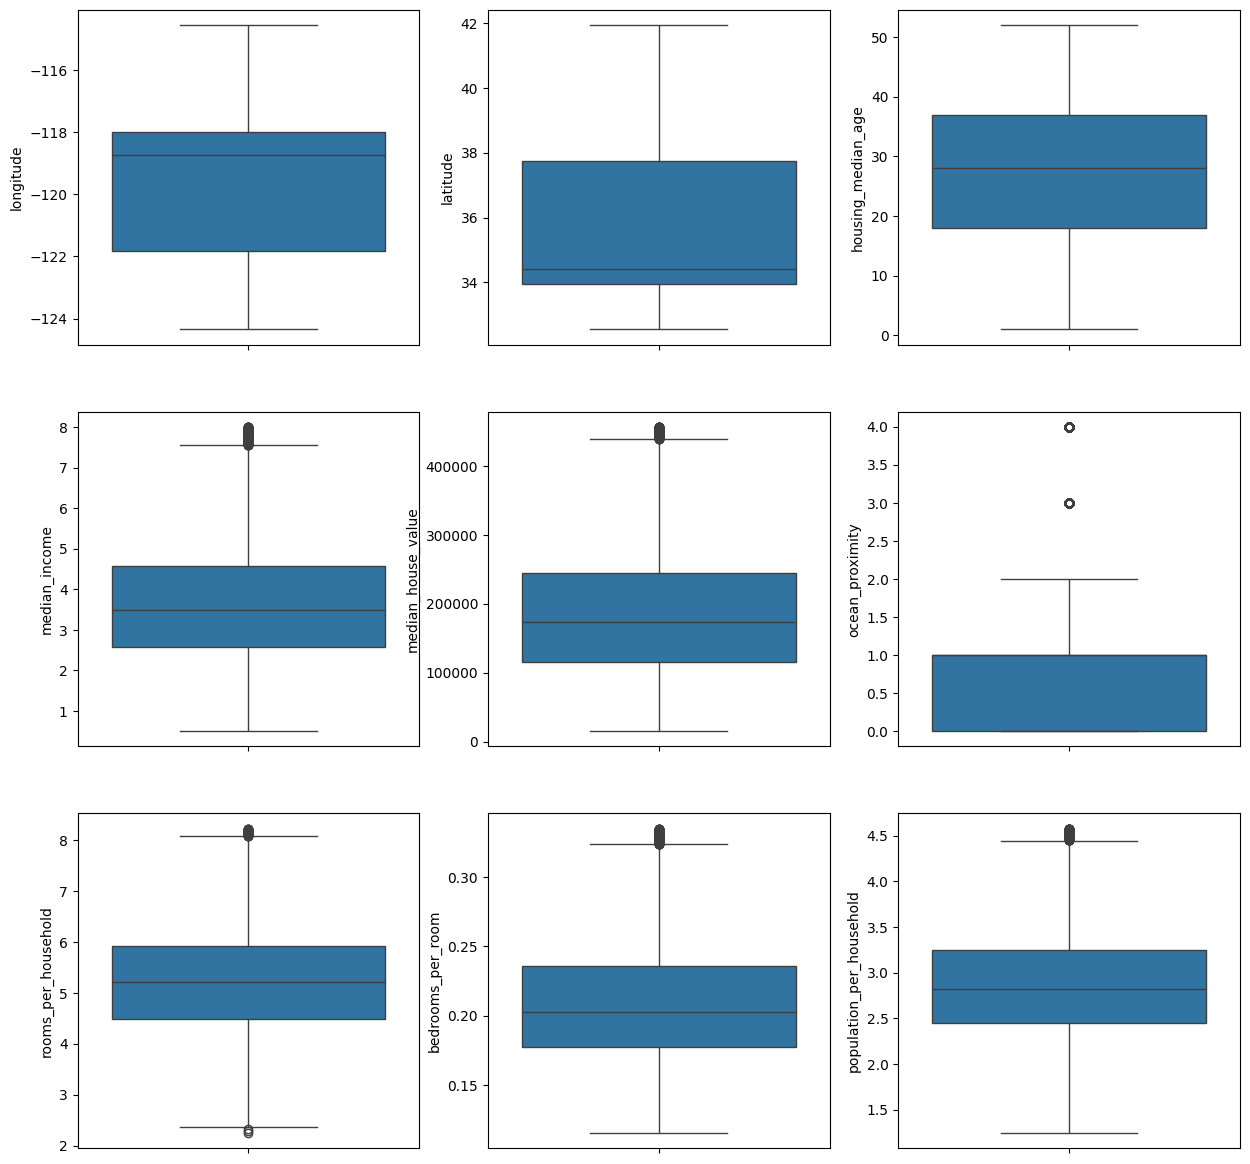

In [29]:
boxplot(df)

In [30]:
df['ocean_proximity'].value_counts()

ocean_proximity
0    7459
1    5928
4    2184
3    1911
2       5
Name: count, dtype: int64

In [31]:
df.shape

(17487, 9)

In [32]:
X = df.drop(columns='median_house_value')
y = df['median_house_value']

In [33]:
# Splitting data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state= 42, test_size=0.2)

In [ ]:
X_train.shape

(14103, 8)

In [ ]:
X_test.shape

(3526, 8)

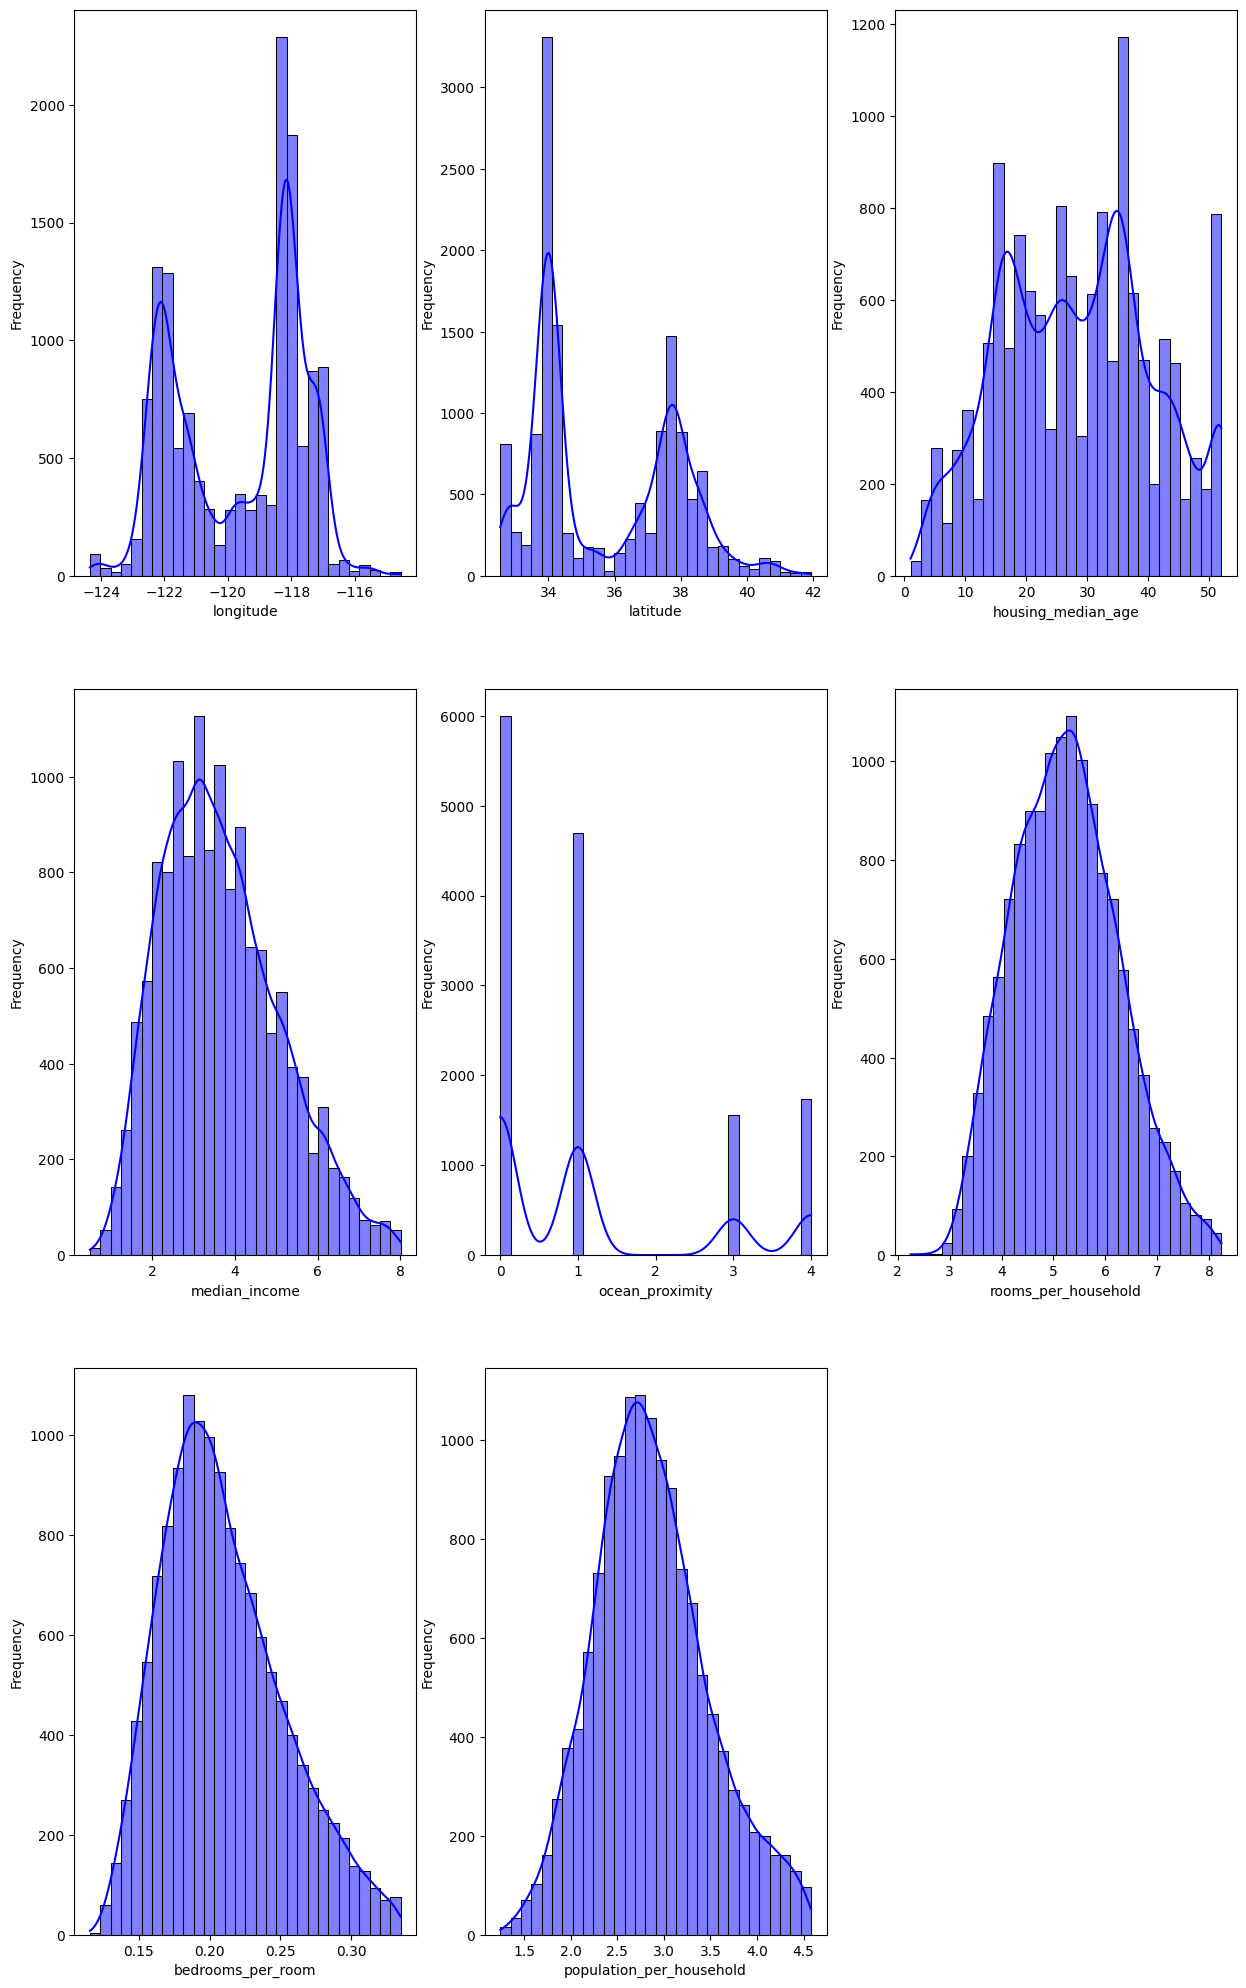

In [34]:
histogram(X_train)

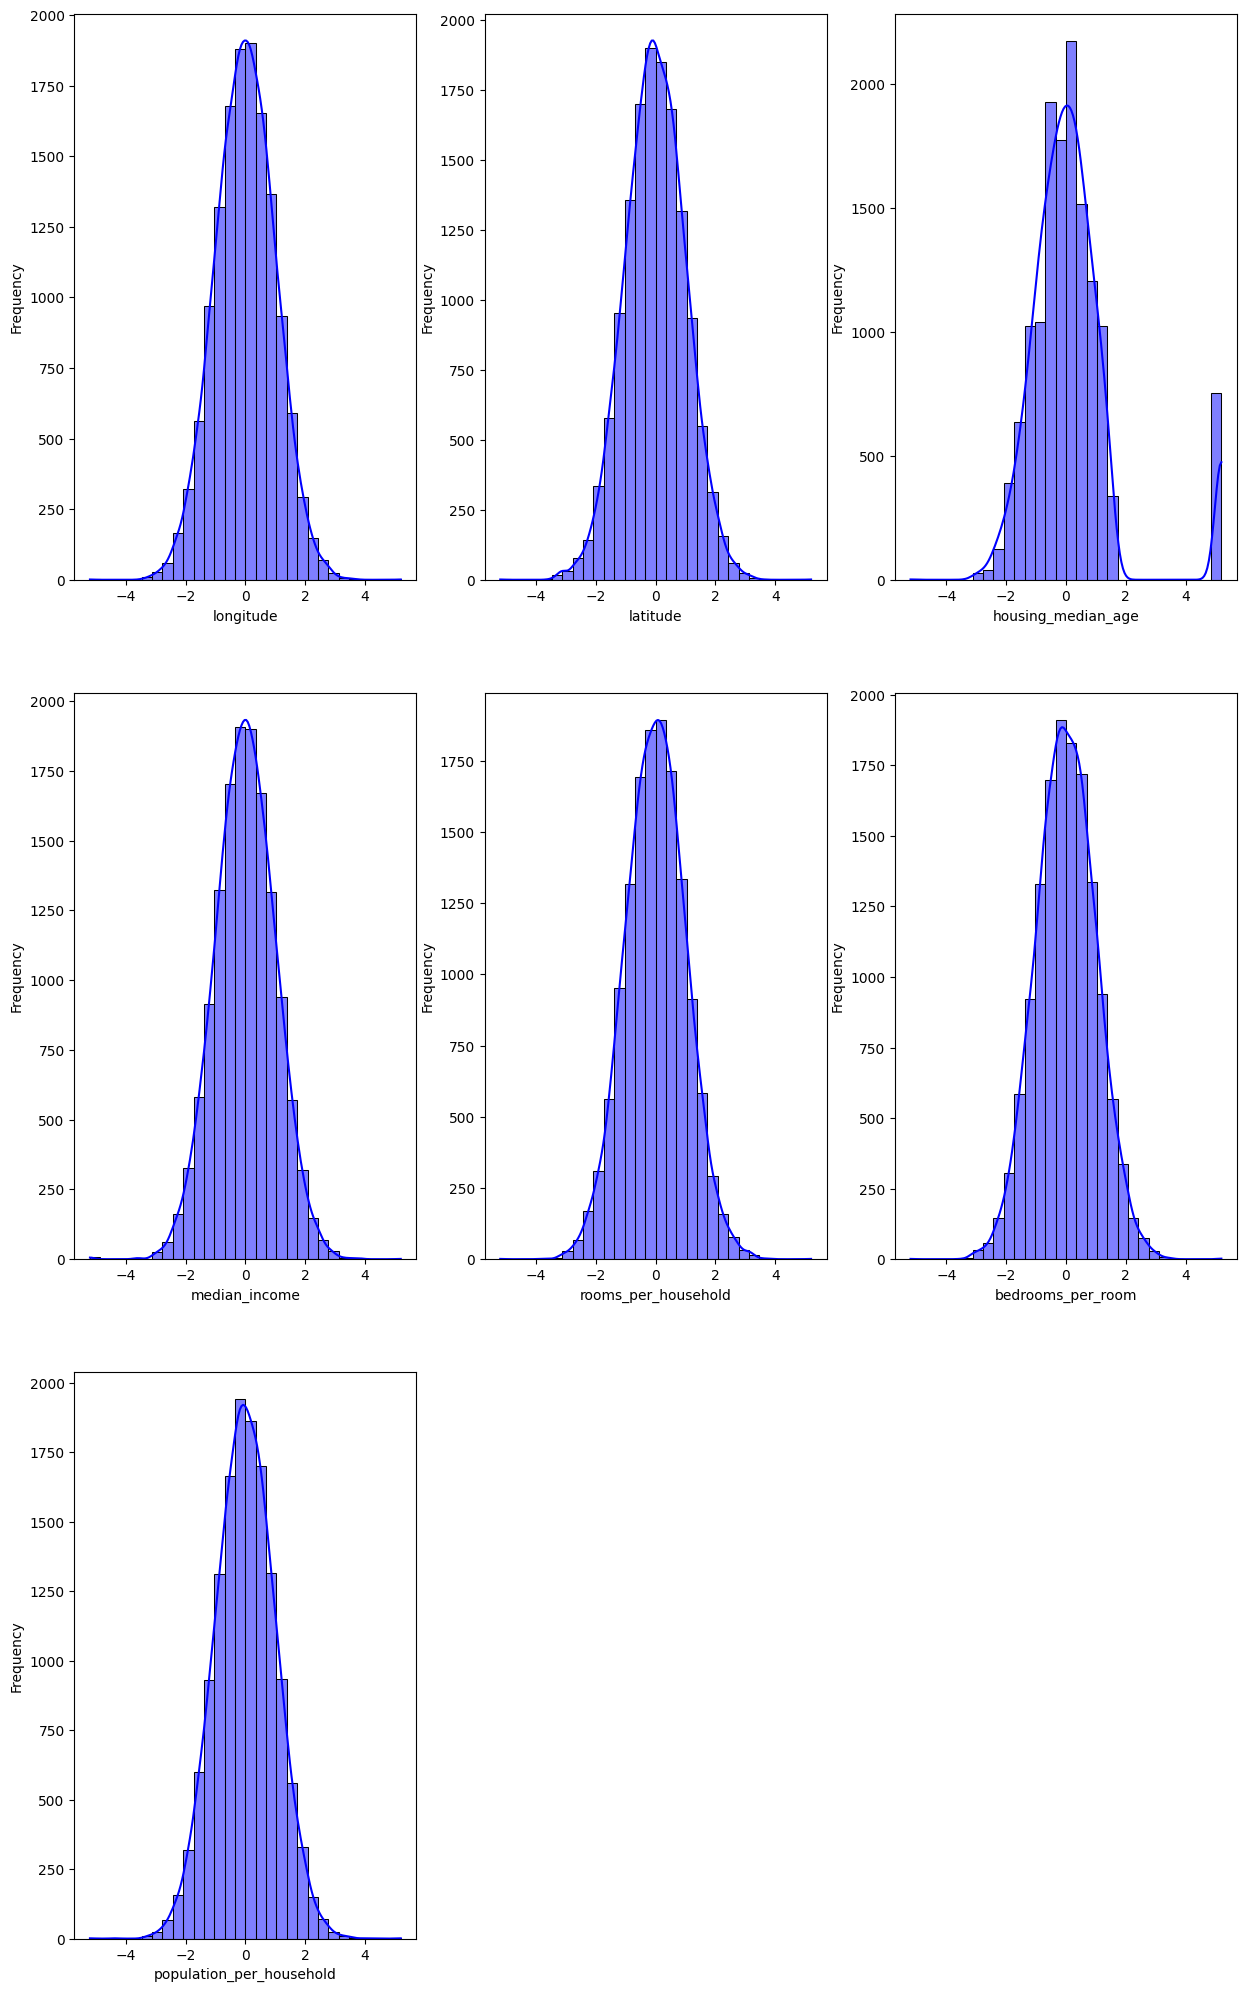

In [36]:
# Quantile Transformation

from sklearn.preprocessing import QuantileTransformer

def transform_columns(df):
    df_transformed = df.copy()
    n_quantiles = min(df.shape[0], 1000)
    qt = QuantileTransformer(output_distribution='normal', n_quantiles=n_quantiles)
    df_transformed[df.columns] = qt.fit_transform(df[df.columns])
    return df_transformed

X_train_transformed = transform_columns(X_train.drop(columns='ocean_proximity'))
histogram(X_train_transformed)

In [37]:
X_train_transformed.insert(len(X_train_transformed.columns), "ocean_proximity",X_train["ocean_proximity"], True)

In [38]:
X_test_transformed = transform_columns(X_test.drop(columns='ocean_proximity'))

In [39]:
X_test_transformed.insert(len(X_test_transformed.columns), "ocean_proximity",X_test["ocean_proximity"], True)

In [40]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continuous_columns = ['longitude', 'latitude', 'housing_median_age',
 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household']
X_train_transformed[continuous_columns] = scaler.fit_transform(X_train_transformed[continuous_columns])
X_test_transformed[continuous_columns] = scaler.fit_transform(X_test_transformed[continuous_columns])

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_regression = LinearRegression()
linear_regression.fit(X_train_transformed, y_train)
y_train_pred = linear_regression.predict(X_train_transformed)
y_test_pred = linear_regression.predict(X_test_transformed)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Train R^2 Score:",train_r2)
print("Test R^2 Score:",test_r2)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print('MAE: ',mae)
print('MSE: ',mse)
print('RMSE: ',rmse)
print('MAPE: ',mape,'%')

Train R^2 Score: 0.5986136445368533
Test R^2 Score: 0.609389704231056
MAE:  43686.989155564275
MSE:  3253269689.3312907
RMSE:  57037.44111836795
MAPE:  29.1050464900402 %


In [ ]:
# Random Forest Regressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

final_model = RandomForestRegressor(n_estimators = 30)
final_model.fit(X_train_transformed, y_train)
y_pred_test = final_model.predict(X_test_transformed)
y_pred_train = final_model.predict(X_train_transformed)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
print('R^2 (Test):', r2_test)
print('R^2 (Train):', r2_train)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
print('MAE: ',mae)
print('MSE: ',mse)
print('RMSE: ',rmse)
print('MAPE: ',mape,'%')


R^2 (Test): 0.7891552820068057
R^2 (Train): 0.966833590584193
MAE:  29171.27838910947
MSE:  1756059012.35284
RMSE:  41905.357800081365
MAPE:  17.07177558086323 %


In [ ]:
# SVM

from sklearn.svm import SVR
from sklearn.metrics import r2_score

svr_regression = SVR(kernel = 'poly', C = 2000, gamma = 1)

svr_regression.fit(X_train_transformed, y_train)

y_train_pred = svr_regression.predict(X_train_transformed)
y_test_pred = svr_regression.predict(X_test_transformed)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print('MAE: ',mae)
print('MSE: ',mse)
print('RMSE: ',rmse)
print('MAPE: ',mape,'%')


Train R^2 Score: 0.5492281931691556
Test R^2 Score: 0.5567858109960366
MAE:  44374.549190355494
MSE:  3691390889.0436964
RMSE:  60756.81763426798
MAPE:  30.308607316186702 %


In [ ]:
# Cat Boost Regressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

best_catboost_reg = CatBoostRegressor(verbose=0, l2_leaf_reg = 1, border_count = 128, learning_rate = 0.1, iterations = 200, depth = 10)
best_catboost_reg.fit(X_train_transformed, y_train)

y_train_pred = best_catboost_reg.predict(X_train_transformed)
y_test_pred = best_catboost_reg.predict(X_test_transformed)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAPE: ', mape, '%')


Train R^2 Score: 0.9083051081591701
Test R^2 Score: 0.8168199858761465
MAE:  27377.373596551275
MSE:  1525648438.0865388
RMSE:  39059.54989610785
MAPE:  16.063009053625713 %
